In [95]:
import math
from datetime import datetime
import matplotlib.pyplot as plt


In [96]:
import pandas as pd
import numpy as np

In [97]:
DATA_PATH='../data/kz.csv'

In [98]:
df = pd.read_csv(DATA_PATH)

In [99]:
len(df) 

2633521

In [100]:
df.head(20)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18
5,2020-04-26 08:45:57 UTC,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18
6,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18
7,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18
8,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18
9,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18


In [101]:
df.columns

Index(['event_time', 'order_id', 'product_id', 'category_id', 'category_code',
       'brand', 'price', 'user_id'],
      dtype='object')

In [102]:
df['price'].sum()

339246427.70999986

In [103]:
np.isnan(df.iloc[19].brand )

True

In [104]:
df['timestamp'] = df['event_time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S UTC"))

In [105]:
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,timestamp
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24 11:50:39
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24 11:50:39
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24 14:37:43
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24 14:37:43
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04-24 19:16:21


In [106]:
month_df = df[df['timestamp'].apply(lambda x: x.month ==4 and x.year==2020  )]

In [107]:
month_df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,timestamp
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24 11:50:39
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24 11:50:39
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24 14:37:43
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24 14:37:43
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04-24 19:16:21


In [108]:
print(f"{len(month_df)} order lines for {month_df.order_id.nunique()}")

57874 order lines for 41649


In [109]:
op_df = month_df.groupby(['order_id','product_id'])


In [110]:
op_df = pd.DataFrame(op_df.timestamp.count())

In [111]:
op_df[op_df['timestamp'] >1]

,,timestamp
order_id,product_id,
2294359932054536986,1515966223509089906,2
2294444024058086220,2273948319057183658,2
2295740594749702229,1515966223509104892,4
2296628237930857206,1515966223509089660,3
2297034737199350540,1515966223509719628,2
2297174044555871159,2273948222957290212,2
2297252054407578606,2273948303177548033,3
2297729407910937541,1515966223509105105,2
2297817716758675935,1515966223510177666,2


In [112]:
df_par =  pd.DataFrame(month_df.groupby(['product_id']).price.sum())

In [113]:
df_par.sort_values(['price'], ascending=False, inplace=True)
df_par.reset_index(inplace=True)

In [114]:
df_par['CumSum'] = df_par['price'].cumsum()

In [115]:
df_par['%CumSum'] = (100 * df_par['CumSum']/df_par['price'].sum())

In [116]:
df_par['%SKU'] = (100 * (df_par.index +1).astype(float)/(df_par.index.max() +1 ))

In [117]:
df_par

,product_id,price,CumSum,%CumSum,%SKU
0,1515966223509088671,113857.41,113857.41,1.480663,0.013576
1,1515966223509088532,107421.30,221278.71,2.877627,0.027152
2,1515966223509088567,97610.22,318888.93,4.147003,0.040728
3,1515966223509089780,71293.60,390182.53,5.074143,0.054304
4,1515966223509088613,65992.32,456174.85,5.932342,0.067879
...,...,...,...,...,...
7361,1515966223523303362,0.00,7689624.61,100.000000,99.945696
7362,1515966223523303361,0.00,7689624.61,100.000000,99.959272
7363,1515966223523303360,0.00,7689624.61,100.000000,99.972848
7364,1515966223523303359,0.00,7689624.61,100.000000,99.986424


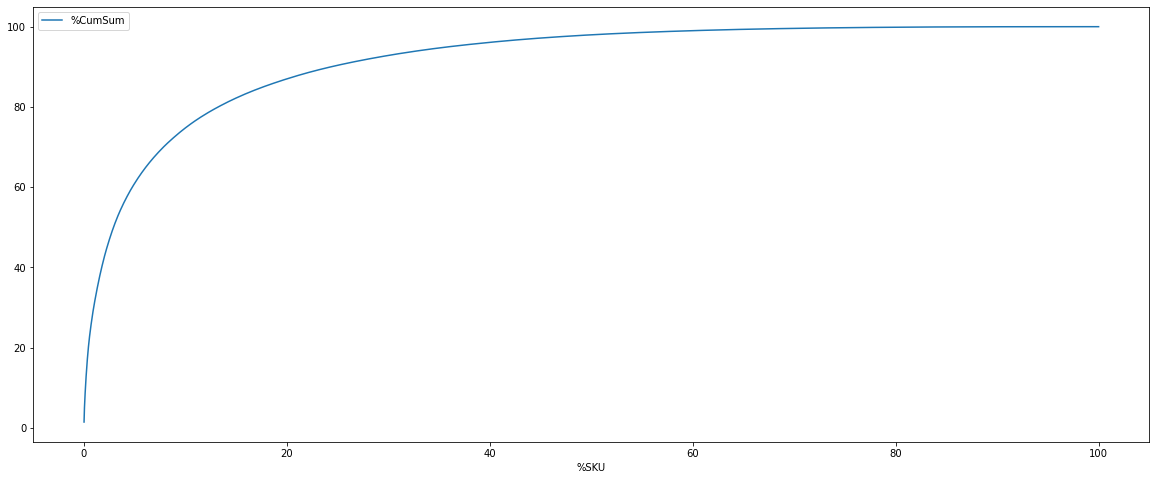

In [118]:
df_par.plot(x='%SKU', y='%CumSum', figsize=(20,8))
plt.show()

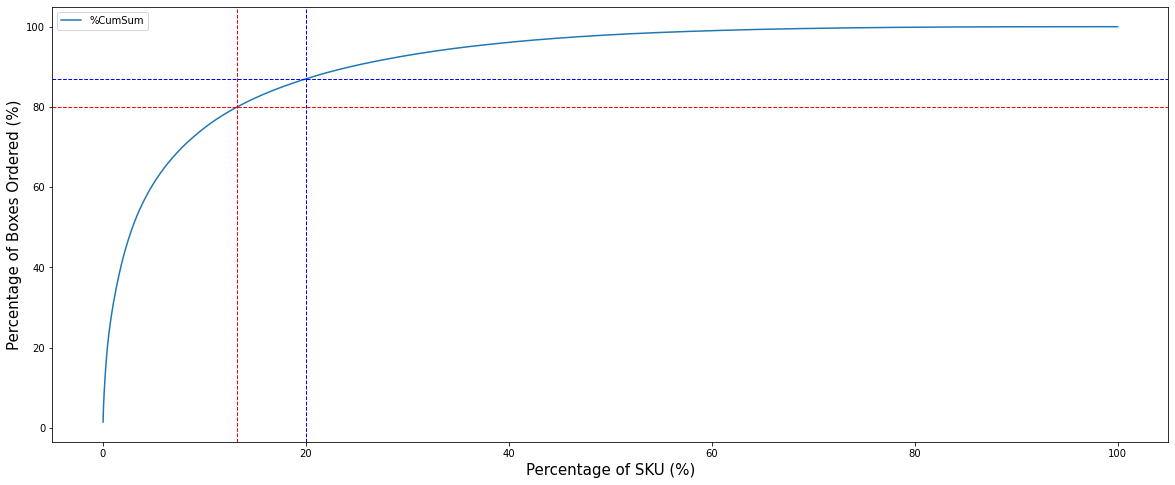

In [119]:
# > 80% volume
df_par80 = df_par[df_par['%CumSum'] > 80].copy()
perc_sku80 = df_par80['%SKU'].min()
perc_sum80 = df_par80['%CumSum'].min()

# 20% sku
df_par20 = df_par[df_par['%SKU'] > 20].copy()
perc_sku20 = df_par20['%SKU'].min()
perc_sum20 = df_par20['%CumSum'].min()


ax = df_par.plot(x='%SKU', y='%CumSum', figsize=(20,8))
plt.xlabel('Percentage of SKU (%)',fontsize=15)
plt.ylabel('Percentage of Boxes Ordered (%)',fontsize=15)
# 80% Volume
ax.axhline(perc_sum80 , color="red", linestyle="--", linewidth = 1.0)
ax.axvline(perc_sku80, color="red", linestyle="--", linewidth = 1.0)
# 20% SKU
ax.axhline(perc_sum20 , color="blue", linestyle="--", linewidth = 1.0)
ax.axvline(perc_sku20, color="blue", linestyle="--", linewidth = 1.0)
plt.show()


In [120]:
perc_sum80, perc_sku80 ,   perc_sum20,perc_sku20

(80.00933546221584, 13.23649199022536, 87.00322121446192, 20.010860711376594)

```

very Fast mover
Class A: the top 5%
- Number of SKU: 16
- Turnover (%): 25%

fast mover
Class B: the following 15%
- Number of SKU: 48 
- Turnover (%): 31%

very slow movers
Class C: the 80% slow movers
- Number of SKU: 253 
- Turnover (%): 43%


# Demand variability
    Average Sales: µ
    Standard Deviation: σ
    Coefficient of Variation: CV = σ/µ

Class A
Fortunately, most of the A SKU have a quite stable demand; we won't be challenged by the most important SKUs.

Class B
The majority of SKUs are in the stable area; however we still spend effort on ensuring optimal planning for the few references that have a high CV.

Class C
Most of the SKUs have a high value of CV;
For this kind of reference a cause analysis would provide better results than a statistical approach for forecasting.
```

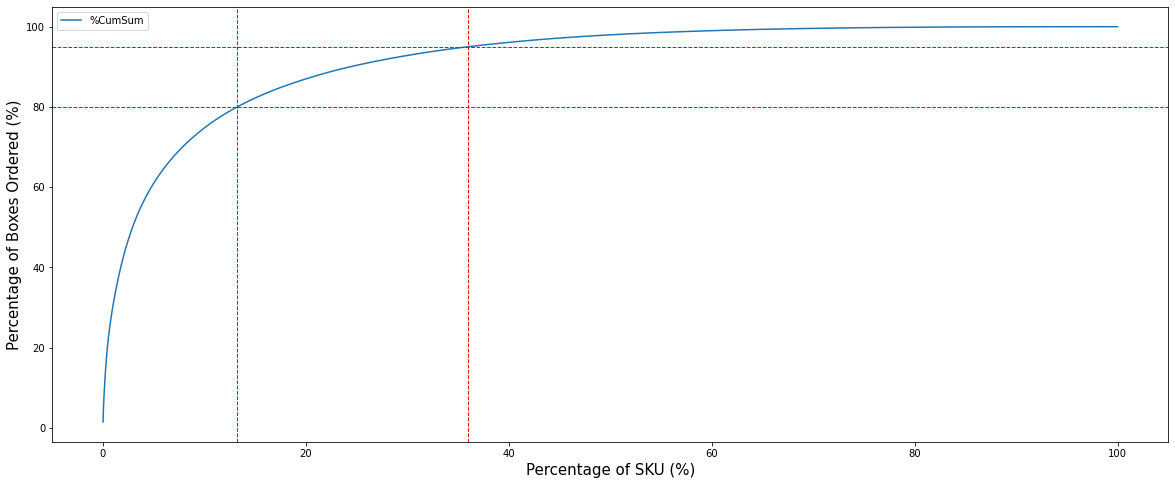

Percetage of Volume is achiv


In [121]:
# > 80% volume
df_par80 = df_par[df_par['%CumSum'] > 80].copy()
perc_sku80 = df_par80['%SKU'].min()
perc_sum80 = df_par80['%CumSum'].min()

# > 95% volume
df_par95 = df_par[df_par['%CumSum'] > 95 ].copy()
perc_sku95 = df_par95['%SKU'].min()
perc_sum95 = df_par95['%CumSum'].min()

ax = df_par.plot(x='%SKU', y='%CumSum', figsize=(20,8))
plt.xlabel('Percentage of SKU (%)',fontsize=15)
plt.ylabel('Percentage of Boxes Ordered (%)',fontsize=15)

# 80% Volume
ax.axhline(perc_sum80 , color="red", linestyle="--", linewidth = 1.0)
ax.axvline(perc_sku80, color="red", linestyle="--", linewidth = 1.0)

# 95% Volume
ax.axhline(perc_sum95, color="red", linestyle="--", linewidth = 1.0)
ax.axvline(perc_sku95, color="red", linestyle="--", linewidth = 1.0)



# # 20% SKU
# ax.axhline(perc_sum20 , color="blue", linestyle="--", linewidth = 1.0)
# ax.axvline(perc_sku20, color="blue", linestyle="--", linewidth = 1.0)


plt.show()

print("Percetage of Volume is achiv")


In [122]:
df_par0_80 = df_par[df_par['%CumSum'] < 80].copy()
df_par80_95 = df_par[(df_par['%CumSum'] > 80) & (df_par['%CumSum'] < 95)].copy()
df_par95_100 = df_par[df_par['%CumSum'] > 95].copy()


In [123]:
len(df_par0_80.product_id),len(df_par80_95.product_id),len(df_par95_100.product_id)

(974, 1675, 4717)

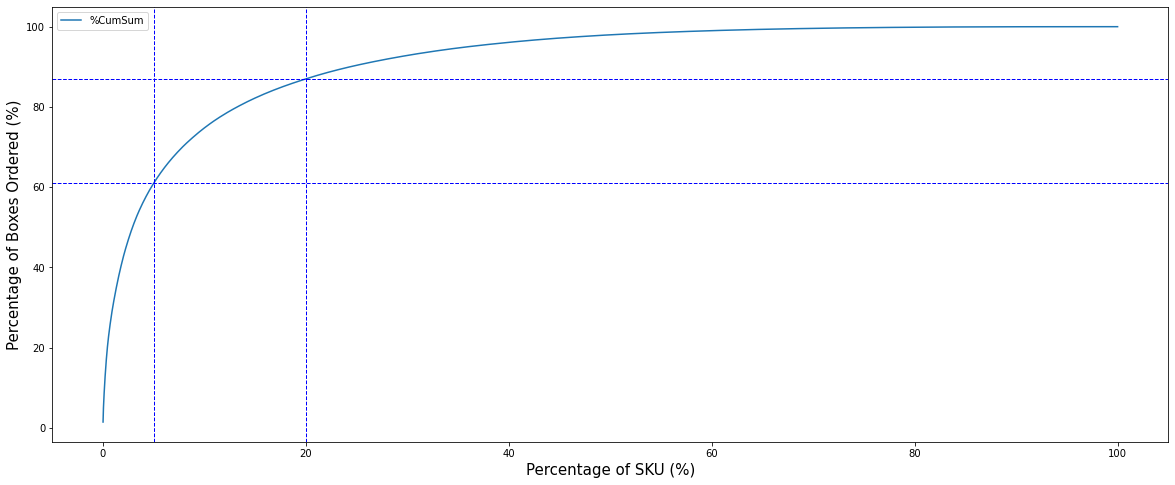

In [124]:
# 5% sku
df_par5 = df_par[df_par['%SKU'] > 5].copy()
perc_sku5 = df_par5['%SKU'].min()
perc_sum5 = df_par5['%CumSum'].min()

# 20% sku
df_par20 = df_par[df_par['%SKU'] > 20].copy()
perc_sku20 = df_par20['%SKU'].min()
perc_sum20 = df_par20['%CumSum'].min()

ax = df_par.plot(x='%SKU', y='%CumSum', figsize=(20,8))
plt.xlabel('Percentage of SKU (%)',fontsize=15)
plt.ylabel('Percentage of Boxes Ordered (%)',fontsize=15)


# 5% SKU
ax.axhline(perc_sum5 , color="blue", linestyle="--", linewidth = 1.0)
ax.axvline(perc_sku5, color="blue", linestyle="--", linewidth = 1.0)
# 20% SKU
ax.axhline(perc_sum20 , color="blue", linestyle="--", linewidth = 1.0)
ax.axvline(perc_sku20, color="blue", linestyle="--", linewidth = 1.0)


plt.show()




In [175]:
# top 5%
df_par5 = df_par[df_par['%SKU'] <= 5].copy()
perc_sku5 = df_par5['%SKU'].max()
perc_sum5 = df_par5['%CumSum'].max()
print(f"top   5% {perc_sku5:05.3f} turnover {perc_sum5:.3f}")

# next 15% sku
df_par20 = df_par[df_par['%SKU'] > 20].copy()
perc_sku20 = df_par20['%SKU'].min()
perc_sum20 = df_par20['%CumSum'].min()
print(f"next 15% {perc_sku20 - perc_sku5:.3f} turnover {perc_sum20 - perc_sum5:.3f}")

# next 80%
# df_par80 = df_par[df_par['%SKU'] ].copy()
perc_sku = df_par['%SKU'].max()
perc_sum = df_par['%CumSum'].max()
print(f"next 80% {perc_sku - perc_sku20:.3f} turnover {perc_sum - perc_sum20:.3f}")


top   5% 4.996 turnover 60.951
next 15% 15.015 turnover 26.052
next 80% 79.989 turnover 12.997


In [176]:
month_df['date'] = month_df['timestamp'].apply(lambda x: x.date())

/tmp/ipykernel_3184/16705360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df['date'] = month_df['timestamp'].apply(lambda x: x.date())


In [177]:
dates = month_df.date.unique()
dates

array([datetime.date(2020, 4, 24), datetime.date(2020, 4, 26),
       datetime.date(2020, 4, 27), datetime.date(2020, 4, 28),
       datetime.date(2020, 4, 29), datetime.date(2020, 4, 30),
       datetime.date(2020, 4, 1), datetime.date(2020, 4, 2),
       datetime.date(2020, 4, 3), datetime.date(2020, 4, 4),
       datetime.date(2020, 4, 5), datetime.date(2020, 4, 6),
       datetime.date(2020, 4, 7), datetime.date(2020, 4, 8),
       datetime.date(2020, 4, 9), datetime.date(2020, 4, 10),
       datetime.date(2020, 4, 11), datetime.date(2020, 4, 12),
       datetime.date(2020, 4, 13), datetime.date(2020, 4, 14),
       datetime.date(2020, 4, 15), datetime.date(2020, 4, 16),
       datetime.date(2020, 4, 17), datetime.date(2020, 4, 18),
       datetime.date(2020, 4, 19), datetime.date(2020, 4, 20),
       datetime.date(2020, 4, 21), datetime.date(2020, 4, 22),
       datetime.date(2020, 4, 23), datetime.date(2020, 4, 25)],
      dtype=object)

In [178]:
month_df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,timestamp,date
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24 11:50:39,2020-04-24
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24 11:50:39,2020-04-24
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24 14:37:43,2020-04-24
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24 14:37:43,2020-04-24
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04-24 19:16:21,2020-04-24


In [179]:
productgp = month_df.groupby(['product_id','date'])[['price']].sum().reset_index() \
            .groupby(['product_id']) \
            .apply(lambda x: (x.price, x.date))
productgp = productgp.reset_index()
productgp

,product_id,0
0,1515966223509088493,"([740.72, 2222.16, 1481.44, 3703.6000000000004..."
1,1515966223509088496,"([532.36, 532.36, 266.18, 266.18, 266.18, 266...."
2,1515966223509088497,"([1215.25, 1215.25, 1215.25, 1215.25, 1215.25,..."
3,1515966223509088498,"([810.04, 347.15999999999997, 462.88, 925.76, ..."
4,1515966223509088499,"([601.83, 601.83, 601.83, 1805.4900000000002, ..."
...,...,...
7361,2309018263561962080,"([2.06], [2020-04-10])"
7362,2309018263721345831,"([10.16], [2020-04-10])"
7363,2322439843247817478,"([266.18], [2020-04-28])"
7364,2327084361012216678,"([18.5], [2020-04-02])"


In [180]:
productgp.rename(columns={0:'date_price'}, inplace=True)

In [181]:
productgp.columns

Index(['product_id', 'date_price'], dtype='object')

In [182]:
productgp['dates'] = productgp['date_price'].apply(lambda x: list(x[1]) ) 
productgp['prices'] = productgp['date_price'].apply(lambda x: list(x[0]) ) 

In [183]:
productgp.drop(columns=['date_price'], inplace=True)
productgp
# productgp.iloc[0].dates

,product_id,dates,prices
0,1515966223509088493,"[2020-04-01, 2020-04-02, 2020-04-03, 2020-04-0...","[740.72, 2222.16, 1481.44, 3703.6000000000004,..."
1,1515966223509088496,"[2020-04-02, 2020-04-03, 2020-04-04, 2020-04-0...","[532.36, 532.36, 266.18, 266.18, 266.18, 266.1..."
2,1515966223509088497,"[2020-04-04, 2020-04-10, 2020-04-14, 2020-04-1...","[1215.25, 1215.25, 1215.25, 1215.25, 1215.25, ..."
3,1515966223509088498,"[2020-04-01, 2020-04-02, 2020-04-03, 2020-04-0...","[810.04, 347.15999999999997, 462.88, 925.76, 9..."
4,1515966223509088499,"[2020-04-01, 2020-04-02, 2020-04-03, 2020-04-0...","[601.83, 601.83, 601.83, 1805.4900000000002, 1..."
...,...,...,...
7361,2309018263561962080,[2020-04-10],[2.06]
7362,2309018263721345831,[2020-04-10],[10.16]
7363,2322439843247817478,[2020-04-28],[266.18]
7364,2327084361012216678,[2020-04-02],[18.5]


In [184]:
productgp.columns

Index(['product_id', 'dates', 'prices'], dtype='object')

In [185]:
def fill_missing_dates(dates, prices, filldates):
    date_price_dict = dict(zip(dates, prices))
    for date in filldates:
        if date not in date_price_dict:
            date_price_dict[date]=0.0
    return list(date_price_dict.keys()), list(date_price_dict.values())

productgp['fill_prices'] = productgp.apply(lambda x: fill_missing_dates(x['dates'],  x['prices'], dates) , axis=1)

In [186]:
productgp['dates']=productgp.fill_prices.apply(lambda x: x[0])
productgp['prices']=productgp.fill_prices.apply(lambda x: x[1])
productgp

,product_id,dates,prices,fill_prices
0,1515966223509088493,"[2020-04-01, 2020-04-02, 2020-04-03, 2020-04-0...","[740.72, 2222.16, 1481.44, 3703.6000000000004,...","([2020-04-01, 2020-04-02, 2020-04-03, 2020-04-..."
1,1515966223509088496,"[2020-04-02, 2020-04-03, 2020-04-04, 2020-04-0...","[532.36, 532.36, 266.18, 266.18, 266.18, 266.1...","([2020-04-02, 2020-04-03, 2020-04-04, 2020-04-..."
2,1515966223509088497,"[2020-04-04, 2020-04-10, 2020-04-14, 2020-04-1...","[1215.25, 1215.25, 1215.25, 1215.25, 1215.25, ...","([2020-04-04, 2020-04-10, 2020-04-14, 2020-04-..."
3,1515966223509088498,"[2020-04-01, 2020-04-02, 2020-04-03, 2020-04-0...","[810.04, 347.15999999999997, 462.88, 925.76, 9...","([2020-04-01, 2020-04-02, 2020-04-03, 2020-04-..."
4,1515966223509088499,"[2020-04-01, 2020-04-02, 2020-04-03, 2020-04-0...","[601.83, 601.83, 601.83, 1805.4900000000002, 1...","([2020-04-01, 2020-04-02, 2020-04-03, 2020-04-..."
...,...,...,...,...
7361,2309018263561962080,"[2020-04-10, 2020-04-24, 2020-04-26, 2020-04-2...","[2.06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([2020-04-10, 2020-04-24, 2020-04-26, 2020-04-..."
7362,2309018263721345831,"[2020-04-10, 2020-04-24, 2020-04-26, 2020-04-2...","[10.16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","([2020-04-10, 2020-04-24, 2020-04-26, 2020-04-..."
7363,2322439843247817478,"[2020-04-28, 2020-04-24, 2020-04-26, 2020-04-2...","[266.18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","([2020-04-28, 2020-04-24, 2020-04-26, 2020-04-..."
7364,2327084361012216678,"[2020-04-02, 2020-04-24, 2020-04-26, 2020-04-2...","[18.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([2020-04-02, 2020-04-24, 2020-04-26, 2020-04-..."


In [187]:
productgp.drop(columns=['fill_prices'], inplace=True)

In [188]:
productgp['mean'] = productgp['prices'].apply(lambda x: np.mean(x))
productgp['std'] = productgp['prices'].apply(lambda x: np.std(x))
productgp['to'] = productgp['prices'].apply(lambda x: np.sum(x))
productgp['to%'] = (100*productgp['to']/productgp['to'].sum())

In [201]:
productgp.sort_values(['to%'], ascending = False, inplace = True, ignore_index=True)
productgp['to%_cumsum'] = productgp['to%'].cumsum()

# A, B, C on SKU Number
n_sku = len(productgp)
n_a, n_b = int(0.05*n_sku), int(0.5*n_sku)
productgp['sku_id'] = pd.Series(range(1, len(productgp))).astype(int)
productgp['sku%'] = (100 * pd.Series(range(1, len(productgp))) / len(productgp))
productgp['abc'] = pd.Series(range(len(productgp))).apply(lambda t: 'A' if t <= n_a-1 else 'B' if t <= n_b-1 else 'C')
# A, B, C on turnover

In [202]:
productgp

,index,product_id,dates,prices,mean,std,to,to%,cv,to%_cumsum,sku_id,sku%,abc
0,89,1515966223509088671,"[2020-04-02, 2020-04-04, 2020-04-05, 2020-04-0...","[925.67, 5554.0199999999995, 4628.349999999999...",3795.247000,2522.061486,113857.41,1.480663,0.664532,1.480663,1.0,0.013576,A
1,23,1515966223509088532,"[2020-04-01, 2020-04-02, 2020-04-03, 2020-04-0...","[1805.3999999999999, 902.6999999999999, 902.69...",3580.710000,2002.511542,107421.30,1.396964,0.559250,2.877627,2.0,0.027152,A
2,43,1515966223509088567,"[2020-04-01, 2020-04-02, 2020-04-04, 2020-04-0...","[1712.46, 2568.69, 2568.69, 2568.69, 856.23, 1...",3253.674000,2628.872452,97610.22,1.269376,0.807970,4.147003,3.0,0.040728,A
3,381,1515966223509089780,"[2020-04-01, 2020-04-02, 2020-04-03, 2020-04-0...","[5601.64, 10184.8, 6110.88, 7638.6, 3055.44, 3...",2376.453333,2278.655379,71293.60,0.927140,0.958847,5.074143,4.0,0.054304,A
4,54,1515966223509088613,"[2020-04-01, 2020-04-02, 2020-04-03, 2020-04-0...","[2036.8000000000002, 1833.1200000000001, 2036....",2199.744000,702.425359,65992.32,0.858200,0.319321,5.932342,5.0,0.067879,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7361,5512,1515966223523303363,"[2020-04-01, 2020-04-02, 2020-04-12, 2020-04-2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000,0.00,0.000000,NaN,100.000000,7362.0,99.945696,C
7362,5511,1515966223523303362,"[2020-04-01, 2020-04-02, 2020-04-03, 2020-04-0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000,0.00,0.000000,NaN,100.000000,7363.0,99.959272,C
7363,5510,1515966223523303361,"[2020-04-01, 2020-04-02, 2020-04-03, 2020-04-0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000,0.00,0.000000,NaN,100.000000,7364.0,99.972848,C
7364,5509,1515966223523303360,"[2020-04-02, 2020-04-03, 2020-04-10, 2020-04-3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000,0.00,0.000000,NaN,100.000000,7365.0,99.986424,C


In [203]:
productgp['cv']=productgp['std']/productgp['mean']
productgp.reset_index(inplace=True)

In [204]:
productgp[productgp['cv']>4]

,level_0,index,product_id,dates,prices,mean,std,to,to%,cv,to%_cumsum,sku_id,sku%,abc
191,191,3959,1515966223509381369,"[2020-04-23, 2020-04-24, 2020-04-26, 2020-04-2...","[8101.83, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",270.061000,1454.322993,8101.83,1.053605e-01,5.385165,47.736039,192.0,2.606571,A
256,256,2253,1515966223509130727,"[2020-04-23, 2020-04-24, 2020-04-26, 2020-04-2...","[6018.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",200.616667,1080.353813,6018.50,7.826780e-02,5.385165,53.686569,257.0,3.489004,A
269,269,2780,1515966223509259715,"[2020-04-11, 2020-04-24, 2020-04-26, 2020-04-2...","[5787.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",192.900333,1038.800086,5787.01,7.525738e-02,5.385165,54.678857,270.0,3.665490,A
278,278,2477,1515966223509244530,"[2020-04-26, 2020-04-24, 2020-04-27, 2020-04-2...","[5555.53, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",185.184333,997.248155,5555.53,7.224709e-02,5.385165,55.345391,279.0,3.787673,A
432,432,1403,1515966223509117288,"[2020-04-28, 2020-04-24, 2020-04-26, 2020-04-2...","[3567.11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",118.903667,640.315841,3567.11,4.638861e-02,5.385165,64.244609,433.0,5.878360,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7153,7153,6644,2273948247972118589,"[2020-04-30, 2020-04-24, 2020-04-26, 2020-04-2...","[0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.000667,0.003590,0.02,2.600907e-07,5.385165,99.999999,7154.0,97.121911,C
7154,7154,4542,1515966223510137480,"[2020-04-12, 2020-04-24, 2020-04-26, 2020-04-2...","[0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.000667,0.003590,0.02,2.600907e-07,5.385165,99.999999,7155.0,97.135487,C
7155,7155,5136,1515966223510521672,"[2020-04-05, 2020-04-24, 2020-04-26, 2020-04-2...","[0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.000667,0.003590,0.02,2.600907e-07,5.385165,99.999999,7156.0,97.149063,C
7156,7156,350,1515966223509089695,"[2020-04-27, 2020-04-24, 2020-04-26, 2020-04-2...","[0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.000667,0.003590,0.02,2.600907e-07,5.385165,100.000000,7157.0,97.162639,C


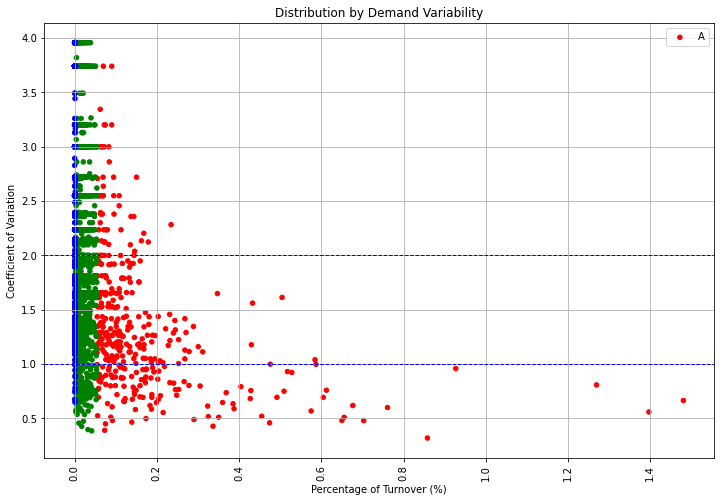

In [206]:
ax = plt.gca()
colors = {'A':'red', 'B':'green', 'C':'blue'}
# Remove Outliers
df_plot = productgp[productgp['cv']<4].copy()
df_plot.plot.scatter(figsize=(12, 8), x='to%', y='cv', color=df_plot['abc'].map(colors), ax =ax, grid = True)
# df_plot.plot.scatter(figsize=(12, 8), x='to%', y='cv', ax =ax, grid = True)
plt.legend(colors)
# ABC
# A, B and C
# ax.axvline(to_a , color="red", linestyle="-", linewidth = 1.0)
# ax.axvline(to_b , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% of SKU Number
ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)
ax.axhline(2 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Percentage of Turnover (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')
plt.title('Distribution by Demand Variability')
plt.show()

In [147]:
a= np.array([280,260,290, 272,300,304, 292, 276,300,292,268,268])
a= np.array([408,204,550,80,360,84,276,132,600,120,360,312])
np.std(a)/np.mean(a)


0.5759254930363215